<pre>
Name: Ritika Sarkar
Reg. No.: 19BAI1031
</pre>

### Image Classification & Machine learning based Medical Image Classification

Dataset - [Histopathologic Cancer Detection](https://www.kaggle.com/c/histopathologic-cancer-detection)

#### Machine Learning - Preprocessing

In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))


In [6]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import random
# from google.colab.patches import cv2_imshow
import pandas as pd 
import os
from skimage.transform import resize
from skimage.io import imread

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [8]:
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report, roc_curve, auc

In [9]:
df = pd.read_csv('../input/histopathologic-cancer-detection/train_labels.csv')

In [10]:
df.head()

,id,label
0,f38a6374c348f90b587e046aac6079959adf3835,0
1,c18f2d887b7ae4f6742ee445113fa1aef383ed77,1
2,755db6279dae599ebb4d39a9123cce439965282d,0
3,bc3f0c64fb968ff4a8bd33af6971ecae77c75e08,0
4,068aba587a4950175d04c680d38943fd488d6a9d,0


In [11]:
image = plt.imread('../input/histopathologic-cancer-detection/train/'+df['id'][1]+'.tif')

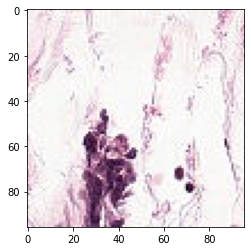

In [12]:
plt.imshow(image)

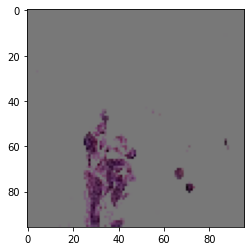

In [18]:
# preprocessing - Simple thresholding - Truncated threshold
# source image, thresholdValue, maxVal, technique
ret, thresh = cv2.threshold(image, 120, 255, cv2.THRESH_TRUNC)
plt.imshow(thresh)

In [19]:
df.shape[0]

220025

In [20]:
# taking a subset of the dataset due to memory error
dfnew = df.sample(n=500) # 500 samples

In [21]:
dfnew['label'].value_counts() # class imbalance

0    292
1    208
Name: label, dtype: int64

In [22]:
dfnew.reset_index(drop = True, inplace = True)

In [23]:
dfnew.head()

,id,label
0,e5013daa1f2fb057e742f527d1623a30fe5669cc,0
1,cb599fd0f9caa951f5f89f1f2a87bcd1f75e9a81,0
2,3c7a946a1a81761cec0bfc108760bf6e26fff559,1
3,b319bc3652b917a1553a6a5311eeb6700dd878a3,1
4,c1f6507c46341f4e80bf6ee89a8154a3e83ebc5c,1


In [24]:
flat_data_arr = [] #input array
target_arr = [] #output array
datadir = '../input/histopathologic-cancer-detection/train/'

#path which contains all the categories of images
for i in range(dfnew.shape[0]):
    img = dfnew['id'][i] + '.tif'
    img_array = imread(os.path.join(datadir,img)) # color image contains more information
#     grayimg = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(img_array, 120, 255, cv2.THRESH_TRUNC) # thresholding - preprocessing
    img_resized = resize(thresh,(96,96,3)) # flattening the image, pixels serve as features
    flat_data_arr.append(img_resized.flatten())
    target_arr.append(dfnew['label'][i])

In [25]:
flat_data = np.array(flat_data_arr)
target = np.array(target_arr)
dfn = pd.DataFrame(flat_data) #dataframe
dfn['Target'] = target

In [26]:
dfn.head()

,0,1,2,3,4,5,6,7,8,9,...,27639,27640,27641,27642,27643,27644,27645,27646,27647,Target
0,0.470588,0.470588,0.470588,0.470588,0.470588,0.470588,0.470588,0.470588,0.470588,0.470588,...,0.415686,0.227451,0.392157,0.470588,0.309804,0.470588,0.470588,0.470588,0.470588,0
1,0.298039,0.172549,0.325490,0.223529,0.094118,0.270588,0.219608,0.094118,0.247059,0.329412,...,0.470588,0.470588,0.470588,0.470588,0.470588,0.470588,0.470588,0.470588,0.470588,0
2,0.443137,0.294118,0.470588,0.211765,0.058824,0.266667,0.219608,0.078431,0.227451,0.415686,...,0.470588,0.470588,0.470588,0.470588,0.470588,0.470588,0.470588,0.470588,0.470588,1
3,0.470588,0.396078,0.470588,0.470588,0.364706,0.470588,0.470588,0.423529,0.470588,0.470588,...,0.278431,0.113725,0.254902,0.470588,0.317647,0.439216,0.470588,0.423529,0.470588,1
4,0.470588,0.372549,0.470588,0.470588,0.470588,0.470588,0.470588,0.396078,0.470588,0.470588,...,0.360784,0.196078,0.352941,0.309804,0.160784,0.313725,0.258824,0.117647,0.266667,1


In [27]:
x = dfn.iloc[:,:-1] #input data 
y = dfn.iloc[:,-1] #output data

In [28]:
y

0      0
1      0
2      1
3      1
4      1
      ..
495    0
496    1
497    0
498    0
499    0
Name: Target, Length: 500, dtype: int64

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)

In [30]:
# metrics consolidated
algos = ['LogReg', 'GaussNB','KNN','RF']
acc = []
auc_sc = []

#### Logistic Regression

In [31]:
logistic = LogisticRegression(solver='liblinear', dual=True, max_iter=5000) # dual = True as n_samples < n_features, max_iter has to be increased more to remove convergence warning
logistic.fit(x_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LogisticRegression(dual=True, max_iter=5000, solver='liblinear')

In [32]:
y_pred = logistic.predict(x_test)

In [33]:
y_pred

array([0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1])

In [34]:
print("Accuracy score", accuracy_score(y_test, y_pred))
print("Confusion matrix\n", confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

Accuracy score 0.62
Confusion matrix
 [[42 23]
 [15 20]]
              precision    recall  f1-score   support

           0       0.74      0.65      0.69        65
           1       0.47      0.57      0.51        35

    accuracy                           0.62       100
   macro avg       0.60      0.61      0.60       100
weighted avg       0.64      0.62      0.63       100



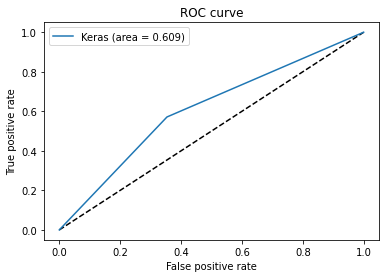

In [35]:
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred)
auc_keras = auc(fpr_keras, tpr_keras)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [36]:
acc.append(accuracy_score(y_test, y_pred))
auc_sc.append(auc_keras)

#### Gaussian Bayes

In [37]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

In [38]:
y_pred = gnb.predict(x_test)

In [39]:
y_pred

array([1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1])

In [40]:
print("Accuracy score", accuracy_score(y_test, y_pred))
print("Confusion matrix\n", confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

Accuracy score 0.51
Confusion matrix
 [[26 39]
 [10 25]]
              precision    recall  f1-score   support

           0       0.72      0.40      0.51        65
           1       0.39      0.71      0.51        35

    accuracy                           0.51       100
   macro avg       0.56      0.56      0.51       100
weighted avg       0.61      0.51      0.51       100



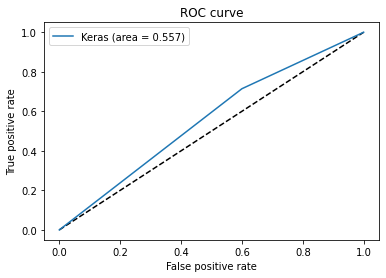

In [41]:
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred)
auc_keras = auc(fpr_keras, tpr_keras)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [42]:
acc.append(accuracy_score(y_test, y_pred))
auc_sc.append(auc_keras)

#### K Nearest Neighbor

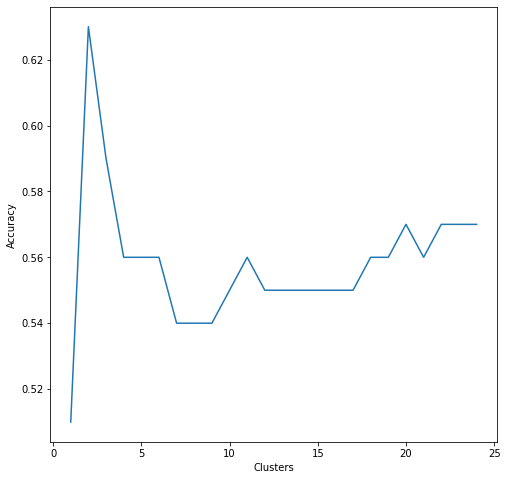

In [43]:
# find k
clusters = [] #value of k
accuracy = []
cr = []
cf = []

for i in range(1,25):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    clusters.append(i)
    accuracy.append(accuracy_score(y_test, y_pred))
    cr.append(classification_report(y_test, y_pred))
    cf.append(confusion_matrix(y_test,y_pred))

plt.figure(figsize=(8,8))
plt.plot(clusters, accuracy)
plt.xlabel("Clusters")
plt.ylabel("Accuracy")
plt.show()

The value of k which gives the maximum accuracy for 2 or more epochs is to be considered. Here we select k=20, 22, 23, 24 for accuracy=0.57

In [44]:
print("Accuracy score", accuracy[19])
print("Confusion matrix\n", cf[19])
print(cr[19])

Accuracy score 0.57
Confusion matrix
 [[44 21]
 [22 13]]
              precision    recall  f1-score   support

           0       0.67      0.68      0.67        65
           1       0.38      0.37      0.38        35

    accuracy                           0.57       100
   macro avg       0.52      0.52      0.52       100
weighted avg       0.57      0.57      0.57       100



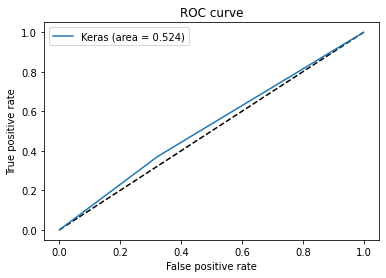

In [46]:
knn = KNeighborsClassifier(n_neighbors = 20)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred)
auc_keras = auc(fpr_keras, tpr_keras)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [47]:
acc.append(accuracy[19])
auc_sc.append(auc_keras)

#### Random Forest

In [48]:
rf = RandomForestClassifier(n_estimators = 100, random_state = 0) 
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [49]:
y_pred = rf.predict(x_test)

In [50]:
print("Accuracy score", accuracy_score(y_test, y_pred))
print("Confusion matrix\n", confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

Accuracy score 0.71
Confusion matrix
 [[52 13]
 [16 19]]
              precision    recall  f1-score   support

           0       0.76      0.80      0.78        65
           1       0.59      0.54      0.57        35

    accuracy                           0.71       100
   macro avg       0.68      0.67      0.67       100
weighted avg       0.70      0.71      0.71       100



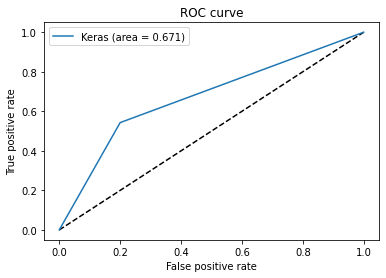

In [51]:
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred)
auc_keras = auc(fpr_keras, tpr_keras)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [52]:
acc.append(accuracy_score(y_test, y_pred))
auc_sc.append(auc_keras)

#### Performance metrics

In [53]:
perf = pd.DataFrame(list(zip(acc, auc_sc)), index = algos, columns = ['Accuracy', 'AUC Score'])

In [54]:
perf

,Accuracy,AUC Score
LogReg,0.62,0.608791
GaussNB,0.51,0.557143
KNN,0.57,0.524176
RF,0.71,0.671429


#### Observation
1. We observe that with preprocessing both the accuracy and AUC scores decrease. More misclassification errors can be observed from the confusion matrix. 
2. Logistic regression still works well despite some reduction in accuracy and AUC scores. However KNN performs worse for class 1, contrary to its performance without preprocessing. The AUC scores for KNN have gone down a lot because of this.
3. Gaussian Naive Bayes is the worst hit performance wise. In the previous notebook, it was declared as the most suitable algorithm for this dataset, but upon preprocessing both its accuracy and AUC scores have reduced drastically. It performs worst for class 0.
4. Random forest also has reduced accuracy and AUC scores, however they are higher than the rest of the models. 
5. So for this use-case (with preprocessing) we observe that Random Forest performs the best.